# Exercise for the 3rd course week

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student update `__init__()` so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ,gender, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file (Each student can appear on multiple lines): 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

Extra: Make the Datasheet class iterable so that next(data_sheet) will return the next course in the list

## Ex 2 Exceptions (extra)
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting (extra)
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


# EX 1

In [12]:
from my_modules.ex3 import assignment1 as a1

courses = []
courses.append(a1.Course("Math", "101", "Johnson, B", 10, 10))
courses.append(a1.Course("English", "505", "Bidden, J", 8, 7))
courses.append(a1.Course("Biology", "331", "Frederiksen, M", 7, 12))
courses.append(a1.Course("German", "222", "Schultz, M", 7 , 6))

ds = a1.DataSheet(courses)

student = a1.Student("Mads Mikkelsen", "male", ds, "https://thumbs.dreamstime.com/z/happy-university-college-student-thumbs-up-15010463.jpg" )


## 5) In DataSheet create a method to get_grades_as_list()

In [13]:
print("Grades: ", student.data_sheet.get_grades_as_list())

Grades:  [10, 7, 12, 6]


## 6) In student create a method: get_avg_grade()

In [14]:
print("Average grade: ", student.get_avg_grade())

Average grade:  8.75


## 7) Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
- Let the function write the result to a csv file with format stud_name, course_name, teacher, ,gender, ects, classroom, grade, img_url

In [3]:
from my_modules.ex3.ex3_data import *

print(MALE_NAMES)
print(COURSES)
print(GRADES)
print(PIC_URLS_MALES)

['Allan', 'Bo', 'Charlie', 'Demetri', 'Eric', 'Freddy', 'George', 'Henry', 'Igor', 'Jerry', 'Kaleb', 'Larry', 'Manny', 'Nicholas', 'Obie', 'Peter', 'Quay', 'Rudy', 'Steve', 'Timmy', 'Umar', 'Victor', 'Woody', 'Xander', 'Yannis', 'Zasou']
[['Math', '111', 'John Watkins', 10, 0], ['English', '505', 'Jane Foster', 8, 0], ['Biology', '331', 'Liz Johnson', 8, 0], ['German', '222', 'Michael Schultze', 6, 0], ['Chemistry', '325', 'Reese Witherspoon', 8, 0], ['French', '225', 'Lina Jenkins', 6, 0], ['Spanish', '200', 'Jerry Larson', 6, 0]]
[-3, 0, 2, 4, 7, 10, 12]
['https://img.freepik.com/free-photo/front-view-male-student-dark-t-shirt-yellow-backpack-holding-files-books-smiling-light-blue-wall_140725-46715.jpg?w=2000', 'https://image.shutterstock.com/image-photo/portrait-smiling-young-college-student-260nw-1192615495.jpg', 'https://st.depositphotos.com/1199142/1784/i/600/depositphotos_17840989-stock-photo-young-happy-student-carrying-books.jpg', 'https://www.kindpng.com/picc/m/57-574905_blac

### my_modules/ex3/tools.py 
```python
from random import randint
from my_modules.ex3.ex3_data import *
from my_modules.ex3.assignment1 import *


def get_rand(lst):
    """Return random item from attached list"""
    return lst[randint(1, len(lst)) - 1]


def get_rand_datasheet():
    """Generates a datasheet with minimum 3 courses (max 5)"""
    courses = []
    # Finding 3 - 5 unique courses
    while len(courses) <= randint(3, 5) - 1:
        c = get_rand(COURSES)
        # Check if course already has been selected
        if not c in courses:
            courses.append(c)
            
    # Convert to Course objects and apply random grade for each.    
    courses = [Course(c[0], c[1], c[2], c[3], assign_random_grades()) for c in courses]
    # Convert to DataSheet object 
    new_ds = DataSheet(courses)    
    return new_ds


def create_n_number_of_students(n):
    students = []
    for i in range(n):
        name = f'{get_rand(MALE_NAMES)} {get_rand(MALE_NAMES)}'
        datasheet = get_rand_datasheet()
        student = Student(name, "male", datasheet, get_rand(PIC_URLS_MALES))
        students.append(student)
    return students


def assign_random_grades():
    # TODO: Make it less likely to return failing grades
    return get_rand(GRADES)
```

In [16]:
from my_modules.ex3.tools import *

students_list = create_n_number_of_students(3)

print(students_list)


[Student('Steve Xander', 'male', DataSheet([Course('German', '222', 'Michael Schultze', 6, 10), Course('English', '505', 'Jane Foster', 8, 4), Course('Spanish', '200', 'Jerry Larson', 6, 4)]), 'https://thumbs.dreamstime.com/b/photo-image-portrait-funny-attractive-cute-young-asian-student-white-shirt-smiling-pointing-forward-side-view-isolated-104697224.jpg'), Student('Woody Eric', 'male', DataSheet([Course('Math', '111', 'John Watkins', 10, 0), Course('German', '222', 'Michael Schultze', 6, -3), Course('English', '505', 'Jane Foster', 8, 7)]), 'https://image.shutterstock.com/image-photo/portrait-smiling-young-college-student-260nw-1192615495.jpg'), Student('Umar Steve', 'male', DataSheet([Course('Biology', '331', 'Liz Johnson', 8, 4), Course('German', '222', 'Michael Schultze', 6, 12), Course('French', '225', 'Lina Jenkins', 6, 4)]), 'https://thumbs.dreamstime.com/b/photo-image-portrait-funny-attractive-cute-young-asian-student-white-shirt-smiling-pointing-forward-side-view-isolated-10

## 8) Read student data into a list of Students from a csv file (Each student can appear on multiple lines):

In [1]:
from my_modules.ex3.file_handler import *
from my_modules.ex3.tools import *

sl = create_n_number_of_students(10)

ds = []

for s in sl:
    #print(s.data_sheet)
    ds.append(DataSheet(s.data_sheet))
        

write_students_to_csv_file("students.csv", sl)

students.csv been added to data folder


### Save a csv file with a line for each course the students have:

In [1]:
from my_modules.ex3.file_handler import *
from my_modules.ex3.tools import *


sl = create_n_number_of_students(20)

write_students_to_csv_file_by_courses("students_courses.csv", sl)

# print(sl[0].data_sheet.courses)

students_courses.csv been added to data folder


### Load a csv file with a line for each course the students have:

In [2]:
from my_modules.ex3.file_handler import *


students_read = read_students_from_csv_file_by_courses("data/students_courses.csv")
print(students_read[:2])


[Student('Rudy Schneider', 'male', DataSheet([Course('English B', '501', 'Tina Fey', '14', '12'), Course('Spanish A', '440', 'Jerry Larson', '20', '12'), Course('French A', '409', 'Lina Jenkins', '20', '7'), Course('Math B', '101', 'Burt Johnson', '16', '4'), Course('Biology A', '331', 'Liz Johnson', '22', '12')]), 'https://www.kindpng.com/picc/m/57-574905_black-college-student-png-transparent-png.png'), Student('Umar Smith', 'male', DataSheet([Course('Spanish B', '432', 'Don Heguin', '12', '12'), Course('German A', '222', 'Michael Schultze', '18', '7'), Course('English B', '501', 'Tina Fey', '14', '10'), Course('Chemistry B', '301', 'Ben Wilson', '16', '12'), Course('Math A', '111', 'John Watkins', '24', '0')]), 'https://image.shutterstock.com/image-photo/portrait-smiling-young-college-student-260nw-1192615495.jpg')]


### A) loop through the list and print each student with name, img_url and avg_grade.

In [3]:
from my_modules.ex3.file_handler import *


students_read = read_students_from_csv_file_by_courses("data/students_courses.csv")

for s in students_read[:5]:
    print(f'Name: {s.name} \nImage: {s.image_url} \nAvg grade: {s.get_avg_grade()}\nTotal ETCS: {s.data_sheet.get_total_ETCS()}\n')

Name: Rudy Schneider 
Image: https://www.kindpng.com/picc/m/57-574905_black-college-student-png-transparent-png.png 
Avg grade: 9.40
Total ETCS: 92

Name: Umar Smith 
Image: https://image.shutterstock.com/image-photo/portrait-smiling-young-college-student-260nw-1192615495.jpg 
Avg grade: 8.20
Total ETCS: 84

Name: Igor Müller 
Image: https://media.istockphoto.com/photos/happy-smiling-student-with-his-notebook-and-backpack-picture-id452257843?k=20&m=452257843&s=612x612&w=0&h=CO5tQouEz8Gwo0t0A4AK3EGss0TDDFFB4oahJHqjRqs= 
Avg grade: 8.40
Total ETCS: 80

Name: Freddy Murphy 
Image: https://image.shutterstock.com/image-photo/portrait-smiling-young-college-student-260nw-1192615495.jpg 
Avg grade: 5.67
Total ETCS: 118

Name: Zasou Schmidt 
Image: https://image.shutterstock.com/image-photo/portrait-smiling-young-college-student-260nw-1192615495.jpg 
Avg grade: 7.86
Total ETCS: 126



### B) sort the list by avg_grade

In [2]:
from my_modules.ex3.file_handler import *


students_read = read_students_from_csv_file_by_courses("data/students_courses.csv")

sortedByAvg = sorted(students_read, key=lambda x: x.get_avg_grade(), reverse=True)


for s in sortedByAvg[:5]:
     print(f'Name: {s.name} \nImage: {s.image_url} \nAvg grade: {s.get_avg_grade()}\nTotal ETCS: {s.data_sheet.get_total_ETCS()}\n')

Name: Rudy Schneider 
Image: https://www.kindpng.com/picc/m/57-574905_black-college-student-png-transparent-png.png 
Avg grade: 9.40
Total ETCS: 92

Name: Igor Müller 
Image: https://media.istockphoto.com/photos/happy-smiling-student-with-his-notebook-and-backpack-picture-id452257843?k=20&m=452257843&s=612x612&w=0&h=CO5tQouEz8Gwo0t0A4AK3EGss0TDDFFB4oahJHqjRqs= 
Avg grade: 8.40
Total ETCS: 80

Name: Umar Smith 
Image: https://image.shutterstock.com/image-photo/portrait-smiling-young-college-student-260nw-1192615495.jpg 
Avg grade: 8.20
Total ETCS: 84

Name: George Brown 
Image: https://thumbs.dreamstime.com/b/photo-image-portrait-funny-attractive-cute-young-asian-student-white-shirt-smiling-pointing-forward-side-view-isolated-104697224.jpg 
Avg grade: 8.00
Total ETCS: 94

Name: Zasou Schmidt 
Image: https://image.shutterstock.com/image-photo/portrait-smiling-young-college-student-260nw-1192615495.jpg 
Avg grade: 7.86
Total ETCS: 126



### C) create a bar chart with student_name on x and avg_grade on y-axis

<IPython.core.display.Javascript object>


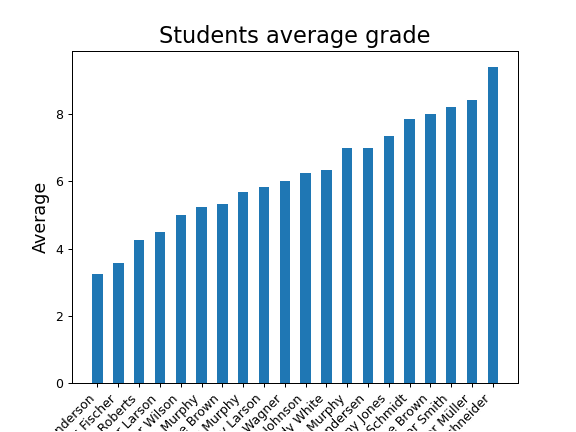

AttributeError: module 'matplotlib.pyplot' has no attribute 'yaxis'

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from my_modules.ex3.file_handler import *

my_data = {}

students_read = read_students_from_csv_file_by_courses("data/students_courses.csv")

for student in students_read:
    my_data.update({ student.name: student.get_avg_grade()})


sorted_dict = dict(sorted(my_data.items(), key=lambda item: item[1]))

plt.title("Students average grade", fontsize=18)
plt.ylabel("Average", fontsize=14)
plt.xlabel("Name", fontsize=14)


plt.bar(sorted_dict.keys(), sorted_dict.values(),width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

plt.yaxis([2,10])

plt.tight_layout()

In [6]:
plt.savefig('data/students_avg_grades.png', bbox_inches='tight')

# EX 2

### my_modules/ex3/tools.py 
```python

class NotEnoughStudentsException(Exception):
    def __init__(self, top, limit):
        self.top = top
        self.limit = limit
        self.message = f'Not enough students found in top: {top}, with a ETCS score higher than: {limit}!'
        super().__init__(self.message)
   

def closest_to_finishing(students, top=3, limit=120):
    sorted_by_ETCS = sorted(students, key=lambda x: x.data_sheet.get_total_ETCS(), reverse=True)
    closest_to_finish = [student for student in sorted_by_ETCS if student.data_sheet.get_total_ETCS() >= limit ]
    try:
        # Checks if the final candidate qualifies or not. 
        if len(closest_to_finish) >= top:
            return closest_to_finish[:top]
        else:
            raise NotEnoughStudentsException(top, limit)
    except (NotEnoughStudentsException) as e:
        print(e)
    
        


```

## 1) Create a function that can take a list of students and return the 3 students closest to completing their study.

In [1]:
from my_modules.ex3.file_handler import *
from my_modules.ex3.tools import closest_to_finishing 



students_read = read_students_from_csv_file_by_courses("data/students_courses.csv")


for s in closest_to_finishing(students_read, 3, 110):
     print(f'Name: {s.name} \nAvg grade: {s.get_avg_grade()}\nTotal ETCS: {s.data_sheet.get_total_ETCS()}\n')

Name: Zasou Schmidt 
Avg grade: 7.86
Total ETCS: 126

Name: Nicholas Fischer 
Avg grade: 3.57
Total ETCS: 126

Name: Freddy Murphy 
Avg grade: 5.67
Total ETCS: 118



## 2) If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)

In [8]:
from my_modules.ex3.file_handler import *
from my_modules.ex3.tools import closest_to_finishing



students_read = read_students_from_csv_file_by_courses("data/students_courses.csv")


print(closest_to_finishing(students_read))

Not enough students found in top: 3, with a ETCS score higher than: 120!
None


## 3) Create another function that can create a csv file with 3 students closest to completion

In [1]:
from my_modules.ex3.file_handler import *
from my_modules.ex3.tools import closest_to_finishing

students_read = read_students_from_csv_file_by_courses("data/students_courses.csv")

data = closest_to_finishing(students_read, 3, 110)

write_three_closest_to_finish(data)

close_to_completion.csv been added to data folder


### A) If an exception is raised write an appropriate message to the file